# Modeling Heat Transfer into Sprayed Droplet
## David Hurt - CHME 512 Presentation
_________________________________________________
### Overall Problem:
The goal is to spray a slurry into fine droplets which dry in a hot, flowing airstream. 
(In reality, the slurry is an aqueous mixture of Carbons, TiO2, and soluble salts/sugars... For this problem, we will assume a uniform substance with no convective flow and conductivity k. )

Several additional constraints/goals exist, which we must simplify away for this problem. We might add those 'complicating factors' in later, but for now this is how we start... 
- The actual goal is to dry the droplet, which would involve a condition where T remains at boiling point while consuming energy. 
- Drying ALSO would involve movement of the (now gaseous) vapor out of the droplet, and crystalizing of the soluble substances. Again, we'll ignore that for now, as that would change the conductivity over time.
- We are assuming that the drying is a FAST process (process time in reality is less than 0.1 second), which may or may not be too fast depending on droplet size. 

For purposes of optimizing this process, we have the following objective: Heat the droplet such that for ALL T(r), $100^oC < T < 180^o C$. This will represent the condition that the entire particle is dried, but not hot enough to have the components begin to react! (In my spray dryer, sugars burn and $NH_4^+$ Salts decompose at temperatures over $180^oC$

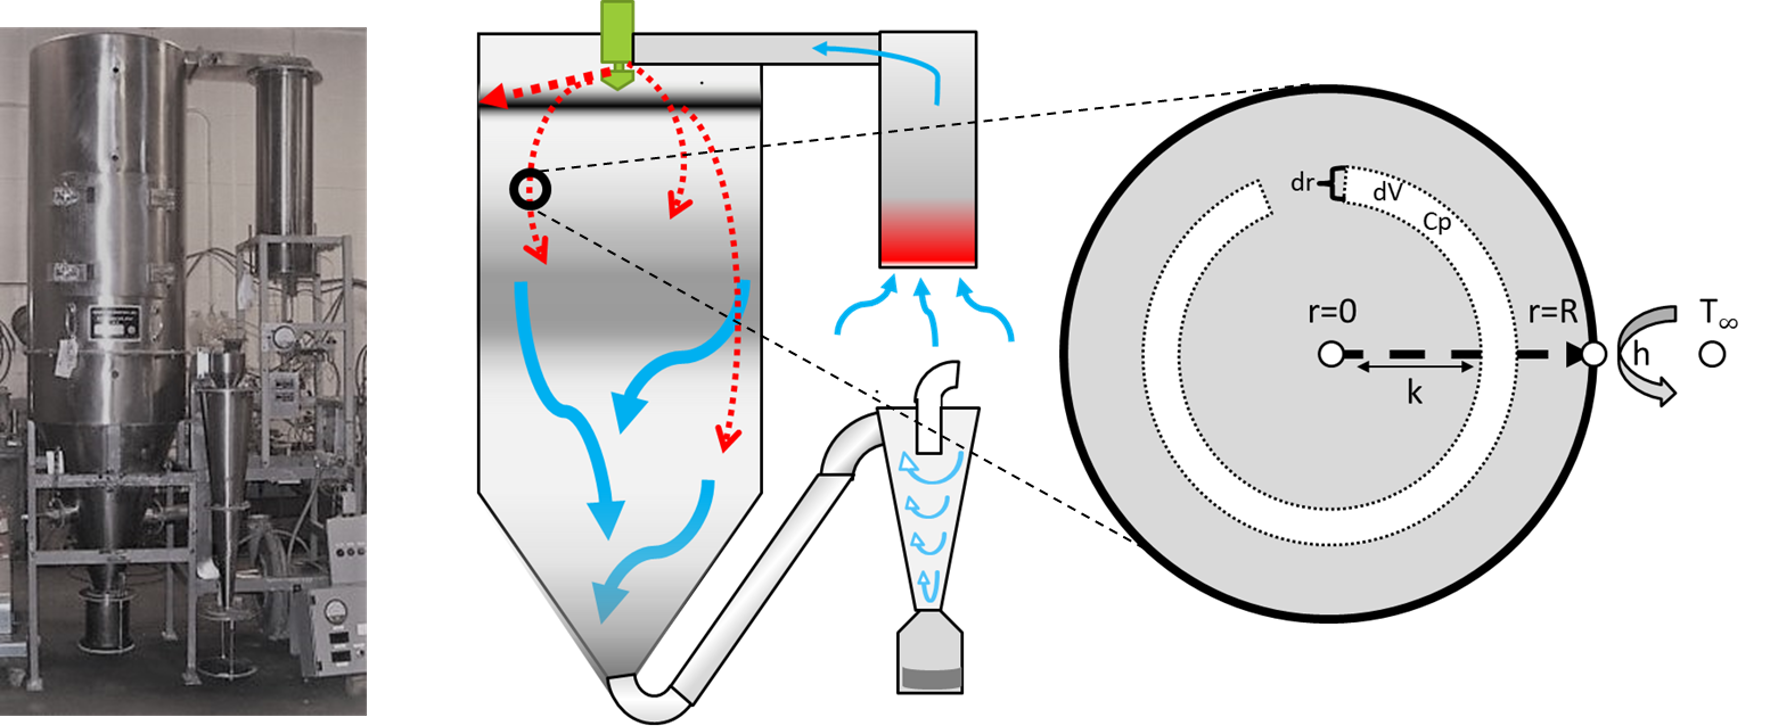

In [1]:
from IPython.display import Image
Image(filename='Combined_Diagram.png',width=1000)

### Boundary Conditions:
At $r=0$ (Center Point Conditions):
- $\frac{dT}{dr}=0\qquad \qquad$: Spherical Symmetry Condition (?)(Double-check that this is always true...might not agree with dT/dt?)
- $T_0=T_0(t)\qquad$   : Center T is finite, and nonzero, and non-fixed. (Temperature Logic.)

At $r=R$ (Edge Conditions):
- $\rho C_p \frac{dT}{dr}=Q_R=h*(A=4\pi R^2)(T_\infty-T_R(t))\qquad $ : Convective Heat Transfer Definition 
- $T_R=T_R(t)\qquad$ : Center T is finite, and nonzero, and non-fixed. (Temperature Logic. Apply later, not at first.)

At $t=0$ (Initial Conditions):
- $T(r)\approx T_0 \qquad$ : All slurry starts at approximately room temperature... *NOTE: Don't strictly apply this boundary condition, as it results in a discontinuity. This is the situation where the PSEUDOSTEADY assumption breaks down, and can be separately solved/approximated as the time required to set up a very steep function which goes to zero 'Almost' instantly, but satisfies the other Boundary conditions.* In reality, the metal spray nozzle would also introduce some starting T-Profile that is not perfect.

At $t=\infty$ (Eventual Steady-State):
- $T(r)=T_\infty \qquad$ : ALL Temperature eventually will be constant at $T_\infty$. Note that this also satisfies both edge conditions because dT/dr is always zero, and the rate of heat transfer is also zero.

## Analytical Solution:

### Heat balance and identifying the PDE:
For the general problem case and boundary conditions put forward above, the most general heat balance (Additive units of Energy per Volume per Time) is:
$$ \rho C_p\frac{DT}{Dt}=k\nabla^2 T + \dot{Q}/V$$
For the Analytical solution (and part 1 of the numerical) we will be ignoring the heat consumption from evaporation term as stated above. In addition, a symmetrical sphere and heating term would have no $\theta$ or $\phi$ dependance of temperature, so all of those terms will drop out of the expanded Conservation Equation:
$$\frac{d T}{dt}=\frac{k}{\rho C_P} \left[ \frac{1}{r^2}*\frac{d}{dr}\left( r^2 \frac{dT}{dr} \right)  \right]$$
We will clean up that $\frac{k}{\rho C_P}$ and identify it as the termal conductivity, described thusly:
$$\alpha = \frac{k}{\rho C_P} = \frac{\left[\frac{J}{mKs}\right]}{\left[\frac{g}{m^3}\right]*\left[\frac{J}{gK}\right]}=\left[\frac{m^2}{s}\right]$$

Dividing through by the $\frac{1}{dr}$ with the product rule:
$$\frac{d}{dr}\left( r^2 \frac{dT}{dr} \right)\Longrightarrow 
\left( r^2 \frac{d^2T}{dr^2}+2r\frac{dT}{dr} \right)$$

Finally, it will make our lives easier in the future to preemptively homogenize the BCs, so replacing T with the driving-Temperature difference AKA $\Theta=T-T_\infty$.As this is a simple translation of T, the derivitives remain unchanged. With all of these substitutions, we can finally clean everything up for the final homogeneous PDE:

$$\frac{d \Theta}{dt}  - \alpha\left[\frac{d^2\Theta}{dr^2}+\frac{2}{r}\frac{d\Theta}{dr}\right]=0  $$

With boundaries such that:
$$@t=0:\quad \Theta=\Theta_i\qquad \qquad @t=\infty:\quad \Theta=0$$
$$ \frac{d\Theta(0,t)}{dr}=0 \qquad \qquad \frac{d\Theta(R,t)}{dr}=\frac{hA}{\rho C_P}*\Theta(R,t)$$

### Beginning to Solve:
#### The Assumed Final
So we can assume the final answer in a format of:
$$ \Theta(r,t)=(D(r)*P(t))$$
Then plug in and rearrange:

$$\frac{d (D(r)*P(t))}{dt}  - \alpha\left[\frac{d^2(D(r)*P(t))}{dr^2}+\frac{1}{r}\frac{d(D(r)*P(t))}{dr}\right]=0  $$

$$\frac{1}{P(t)}\frac{d P(t)}{dt}  = \frac{\alpha}{D(r)}\left[\frac{d^2D(r)}{dr^2}+\frac{2}{r}\frac{dD(r)}{dr}\right]=-\lambda  $$
Where the LHS is only a function of t and the RHS is only a function of r, and therefore can both be considered constant as some "lambda". We will solve the RHS first using the Finite Fourier series, as it is certainly the more complex side... 
$$ \frac{d^2D(r)}{dr^2}+\frac{2}{r}\frac{dD(r)}{dr}+\frac{\lambda }{\alpha}D(r) =0$$
This is a special case of the Bessel function known as the Spherical Bessel Function, and will return a result in a different but known format, as we will see below.


### Checking Eigenvalues
To check all possible eigenfunctions, we need to evaluate the various eigenfunctions to see if they can fit boundary conditions. First, here are the three possible Lambda categories of interest:

$$ \lambda>0 \quad \Rightarrow \quad D(r)=A\frac{\sin \left( r\sqrt{\frac{\lambda}{\alpha}}\right)}{r}+B\frac{\cos\left((r\sqrt{\frac{\lambda}{\alpha}}\right)}{r}$$

$$ \lambda<0 \quad \Rightarrow \quad D(r)=A\frac{\sinh \left( r\sqrt{\frac{\lambda}{\alpha}}\right)}{r}+B\frac{\cosh\left((r\sqrt{\frac{\lambda}{\alpha}}\right)}{r}$$

$$ \lambda=0 \quad \Rightarrow \quad D(r)=A\frac{\sin \left( 0\right)}{r}+B\frac{\cos\left(0\right)}{r}=\frac{B}{r}$$
The Zero-case is not immediately trivial, and we will re-examine that in a moment. 

NOTE: I'm getting tired of typing $\sqrt{\frac{\lambda}{\alpha}}$, so we will replace it with "m" which is the convention Deen follows in the spherical bessel function chapter! 

For the first Boundary condition, we are testing that the first derivitive $\frac{dD(r)}{dr}$, which is zero at r=0 and positive at r=R. We need to consider the first dirivitives of the above equations. NOTE this is a minor pain and require some product-rule terms, but here they are:

$$ \lambda>0 \quad \Rightarrow \quad \frac{dD(r)}{dr}=
A\left[\frac{ mr \cos(mr)-\sin(mr)}{mr^2}\right]-
B\left[\frac{ mr \sin(mr)+\cos(mr)}{mr^2}\right]$$

$$ \lambda<0 \quad \Rightarrow \quad \frac{dD(r)}{dr}=
A\left[\frac{ mr \cosh(mr)-\sinh(mr)}{mr^2}\right]+
B\left[\frac{ mr \sinh(mr)-\cosh(mr)}{mr^2}\right]$$

The boundary condition at the center follows with no major modifications. At the edge r=R, The same thing happens as in the DiffEQ, where the $P(t)$ term pulls out front and cancels: 

$$ r=0 \qquad \frac{dD(r)}{dr}=0 $$

$$ r=R \qquad \frac{d P(t)D(r)}{dr}=\frac{hA}{\rho C_P}*P(t)D(r)$$
$$ \frac{d D(r)}{dr}=\frac{hA}{\rho C_P}*D(r)$$


In either case, the B-term drops out following the r=0 boundary condition, as follows:

$$ \lambda>0 \quad \Rightarrow \quad 0=
A\left[\frac{ m(0) \cos(0)-\sin(0)}{m(0)^2}\right]-
B\left[\frac{ m(0) \sin(0)+\cos(0)}{m(0)^2}\right]$$
$$ \Rightarrow \quad 0=
A\left[\frac{ m(0) 1-0}{m(0)^2}\right]-
B\left[\frac{ m(0) 0+1}{m(0)^2}\right]\qquad \quad$$
$$ \Rightarrow \quad 0=
B*\infty \qquad \qquad \qquad \qquad\qquad \qquad$$

$$ \lambda<0 \quad \Rightarrow \quad 0=
A\left[\frac{ mr \cosh(0)-\sinh(0)}{m(0)^2}\right]+
B\left[\frac{ mr \sinh(0)-\cosh(0)}{m(0)^2}\right]$$
$$ \Rightarrow \quad 0=
A\left[\frac{ m(0) 1-0}{m(0)^2}\right]+
B\left[\frac{ m(0) 0-1}{m(0)^2}\right] \qquad \quad$$
$$ \Rightarrow \quad 0=
B*\infty \qquad \qquad \qquad \qquad\qquad \qquad$$

Since the B-Term has been eliminated, we can now conclude that the $\lambda=0$ result is **indeed** trivial, and so will not be included in further considerations.

To solve for the edge BC will require both the D(r) and the derivitive equations. Note that it will not provide values for A, but will constrain the eigenvalues:
$$\Large \lambda>0:$$

$$ A\left[\frac{ mR \cos(mR)-\sin(mR)}{mR^2}\right] = 
\frac{h4\pi R^2}{\rho C_P}*A\frac{\sin(mR)}{mR}$$

$$mR \cos(mR)-\sin(mR) = 
\frac{h4\pi R^3}{\rho C_P}*\sin(mR)$$
$$mR\cos(mR) = \left(\frac{h4\pi R^3}{\rho C_P}+1\right)*\sin(mR)$$
$$m = \left(\frac{h4\pi R^2}{\rho C_P}+\frac{1}{R}\right)*\tan(mR)$$
Now... This is tricky, although the big scary thing is just a constant. Perhaps we can solve for possible values of m by taking the derivitive of both sides, since everything else is constant and the non-trig term will drop away?
$$\frac{d}{dm}(m)= \left(\frac{h4\pi R^2}{\rho C_P}+\frac{1}{R}\right)*\frac{d}{dm}\tan(mR)$$
$$ 1=\left(\frac{h4\pi R^2}{\rho C_P}+\frac{1}{R}\right)*\frac{R}{\cos^2(mR)}$$
$$ \cos^2(mR)=\frac{h4\pi R^3}{\rho C_P}+1$$

$$ \cos(mR)=\sqrt{\frac{h4\pi R^3}{\rho C_P}+1}$$

$$m=\frac{1}{n\pi R}\cos^{-1}\left[\sqrt{\frac{h4\pi R^3}{\rho C_P}+1}\right]$$
Note the domain here - for positive intergers of n this function reciprocates with period n, however, the arccos function presents a major problem, as the funciton inside the radical is all positive numbers + 1, and will *not* fit into the arc-cosine function which must be less than 1...
The derivitive solution idea clearly didn't work then. ok. because there should clearly be infinite solutions of n. Perhaps, they will have to be numerically solved.

-------------------------
$$\Large \lambda<0:$$
$$ A\left[\frac{ mR \cosh(mR)-\sinh(mR)}{mR^2}\right] = 
\frac{h4\pi R^2}{\rho C_P}*A\frac{\sinh(mR)}{mR}$$
$$mR \cosh(mR)-\sinh(mR) = 
\frac{h4\pi R^3}{\rho C_P}*\sinh(mR)$$
$$mR\cosh(mR) = \left(\frac{h4\pi R^3}{\rho C_P}+1\right)*\sinh(mR)$$
$$m = \left(\frac{h4\pi R^2}{\rho C_P}+\frac{1}{R}\right)*\tanh(mR)$$
Note: TanH is not oscilitory, and therefore there will only be one value of $0>\lambda$, if any... The derivitives of tanh() and tan() follow all the same patterns, and so we can presume the same result as above in the hyperbolic space, and see if that makes any sense...
$$m=\frac{-1}{R}\cosh^{-1}\left[\sqrt{\frac{h4\pi R^3}{\rho C_P}+1}\right]$$

This case is the opposite of the first case, where there is a valid solution because the constraint is that inside the arc-CosH term must always be GREATER than 1, which is true for all possible values. I'm not sure if this agrees with the cosh solution from before, so we should check...


To find the domain of possible $\lambda_n$ values, we will switch to python and plot them up as an example of possible m values. For this we will assume an arbitrary $\left(\frac{h4\pi R^2}{\rho C_P}+\frac{1}{R}\right)=2$ and an $R=3$

In [2]:
import matplotlib.pyplot as plt
import numpy as np
S=1
R=1
A=S*R**2+1/R
m_neg=np.linspace(-1/R,0,10000) 
F_neg=np.tanh(R*m_neg)
m_pos=np.linspace(0,20/R,10000)
F_pos=np.tan(R*m_pos)
Neg_sol=-1/R/np.pi*np.arccosh((S*R**3+1)**0.5) #?? Does it work? No!
print(Neg_sol)

fig,ax=plt.subplots()
ax.plot(m_neg,m_neg/A,'--k')
ax.plot(m_pos,m_pos/A,'--k')
ax.plot(m_neg,F_neg,'-b')
ax.plot(m_pos,F_pos,',r')
ax.set_ylim([-20,20])
ax.set_title('Possible Values for M=sqrt(lambda/alpha)')
#ax.set_xlim([-10,10])

-0.28054992616959007


Text(0.5,1,'Possible Values for M=sqrt(lambda/alpha)')

In contrast from the above note, we get very real values for M at positive lambda values, however we may get no intersection in the negative x range. Depending on the value of R, m will either have a single negative value, or otherwise it will have a value on the first instance of tan(mR). 

## Numerical Model Solutions:

### Heat Balance + Solution Strategy:
This should be solvable by continuously iterating over thin shells from r=R to r=0. For each interface (starting at the outside) the $Q_{IN}$ and $Q_{OUT}$ can be calculated by the dT/dr derivitive times the thermal conductivity and the Surface area at that interface. 
$$ Q[Watts]= A_{Surface}[m^2] * k\left[\frac{Watts}{m *K}\right] *\frac{dT}{dr}\left[\frac{K}{m}\right] $$

For two surfaces separated by $\Delta r$, the inner surface will have a smaller Area, and thus permit less heat transfer for a given dT/dr. (NOTE A Priori, that the inner surfaces should also have a lower dT/dr value *(I'm pretty sure?)*, which will make that effect more significant. The mass of the spherical shell $(\rho V)$ will then absorb the difference in heat flux, and will heat up as according to the heat capacity. *Note: in the water case, would instead absorb as $\Delta H_{vap}$ at 100C...*
$$ Q= Q|_{IN} - Q|_{OUT} = V_{Shell}*\rho*C_P\frac{dT}{dt}$$




### Part 1: Establishing a functional Model
As described above, we can create a numerical model to perform infintesimal shell balances on the droplet, and to apply the heat balance on each shell (with the central shell having no interior, and the outer shell having input heat from convection instead of conduction. 

To build the initial model, We will first consider the case of heating a pure liquid droplet, without the heat of vaporization. (We'll set up those values in the beginning, but not use them. 

From prior experimentation, it can be difficult to train a model with descrete time increments. Instead, it can be useful to work in descrete packets of energy. Fixing the Energy transfer per-unit-loop helps prevent the model from predicting random fluctuations (which occur due to over-correction). Instead, a fixed energy determines the internal behavior, and satisfies the convection boundary condition because since the Time Step is unfixed, it can be solved for by the convection equation! (Time-step is the result of the heat step divided by the convection heat rate)

For this first model, we will look at a simple droplet with a mild Biot number. $300\mu m $ is a reasonable radius for a sprayed droplet, and forced convection can range within an order of magnitude of $1000\frac{W}{m^2K}$. In reality, the heat constant k is a function of temperature from 0.3 to 0.6... For now, we'll simplify it to a median value of $0.5 \frac{W}{mK}$. The characteristic length of a sphere is such that the Biot number is as follows:
$$ Bi=\frac{L_C*h}{k}=\frac{R/3*h}{k}=\frac{0.0001m*1000\frac{W}{m^2K}}{0.5\frac{W}{mK}}=0.2$$

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

#Use this to report better values
from math import log10, floor
def round_2(x): return round(x, 2-int(floor(log10(abs(x)))))

#Describe the Droplet
R=300*10**(-6) # Droplet Radius, meters (eg. 500 microns)
h=1500          # Watts/m^2 K (convective heat transfer. a "Typical" value for flowing hot air)
k=0.500         # Watts/m K (Thermal Conductivity (Assumed Constant Here, looked up normal value for water...))
Cp=4.18         # J/g K     (Again, lookup value for water)
rho=1*10**(6)   # g/m^3      (Water by definition)
HVap=2256.4     # J/g to Evaporate water. NOTE: is 500x the Q for 1K dT - more than 5x the Q for 100C change

#Describe the System
Ti=300 + 273.16 #K, heat of system (Maybe make f(t) eventually)
T0=25  + 273.16 #K, Initial Temperature of water (Constant at all points)

time=0.5 # Seconds in the spray dryer (max time to solve for)
dt=0.001       # dt value, in seconds (0.1 milisecond)
t_vals=[] #New Idea. Fix delta T (at the surface), and simply RECORD the time of each step!

dr=10*10**(-6) # dr value, in meters (10 microns, 100 points)
r_vals=np.arange(0,R+dr,dr)
A_Vals=4*np.pi*r_vals**2 #Area of the shell at r 
V_Vals=r_vals*0
for i,r in enumerate(r_vals[1:]):
    V_Vals[i+1] = 4/3*np.pi*r**3 - 4/3*np.pi*r_vals[i]**3 #Volume of the shell at r - 
H_Vals=rho*V_Vals*HVap


Temps=r_vals*0+T0 #Set initial Temperature profile = T0 is constant?
dTdt=r_vals*0 #Set dTdt 
Biot=(R/3)*h/k

# fig, ax = plt.subplots(figsize=[10,5])
# ax.set_ylim([0,300])
# ax.set_ylabel("Temperature *C")
# ax.set_xlabel("Radius (Microns)")
# ax.set_title("Heating with T="+str(round(Ti-273.16))+'*C   Biot='+str(round_2(Biot)))
# ax.axhspan(125, 175, alpha=0.1, color='black')

Plot_T=np.linspace(273,Ti+10,50) #Plot n solutions
azm=np.linspace(0,2*np.pi,365)
r_V,Th_V=np.meshgrid(r_vals,azm)
Plots,a=np.meshgrid(r_vals,Plot_T)
#for t in t_vals:
#     dt=0.0001
#     #For each timestamp, first do the balance on r at the edge. 
    
dT=0.001 #Kelvin per step for initial solution
p=0 # Index of temperatures to plot.
t=10**-15 # Initiate Time-Counter

T_S= Temps[-1]
while T_S <Ti*0.90:
    
    T_S= Temps[-1] #Record surface temperature, will decide which to plot
    
    if T_S > Plot_T[p]:
        Plots[p,:]=Temps
        p=p+1
        #print(str(round_2(t)*10**3)+" milliSeconds")
    
    for i,r in enumerate(r_vals): #Loop through all r values to find dT/dt
        if r==0:
            Q_out=0         #Boundary condition at middle - no place for that temperature to go.
        else:
            Q_out=(4*np.pi*(r)**2)*k*(Temps[i]-Temps[i-1])/dr    #Conduction through shell at r

        if r==max(r_vals):
            Q_in = (4*np.pi*(r**2))*h*(Ti-Temps[i])    #Convection at edge of shell
        else:
            Q_in = (4*np.pi*((r+dr)**2))*k*(Temps[i+1]-Temps[i])/dr #Conduciton through shell at -r

        Q = Q_in - Q_out

        V=4/3*np.pi*((r+dr)**3-(r)**3)

        dTdt[i]= (Q) / (rho*V*Cp) # K/s,   (Watts) / (g/m3 * m3 * J/gK)
        
    if dTdt[-1]>0:
        deltaT=dT* dTdt/dTdt[-1] #CALCULATE the time step as the time required for a dT-sized change at the surface
        t=t+dT/dTdt[-1] #Capture the time elapsed
    #small delta T was required for smooth startup. I think we can use faster dT steps once we're in the weeds!
    if T_S>300:
        dT=0.05
    elif T_S>400:
        dT=0.1
    
    Temps=Temps+deltaT
    

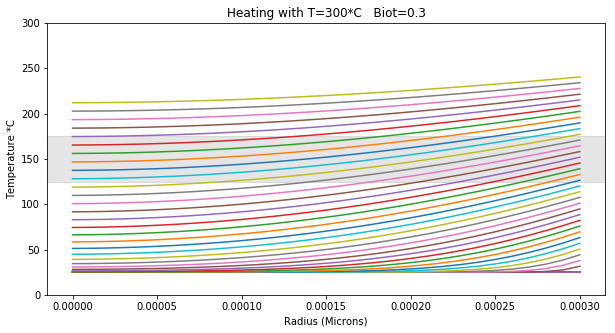

In [4]:
fig, ax = plt.subplots(figsize=[10,5])
ax.set_ylim([0,300])
ax.set_ylabel("Temperature *C")
ax.set_xlabel("Radius (Microns)")
ax.set_title("Heating with T="+str(round(Ti-273.16))+'*C   Biot='+str(round_2(Biot)))
ax.axhspan(125, 175, alpha=0.1, color='black')
for i,T in enumerate(Plot_T):    
    ax.plot(r_vals,Plots[i,:]-273.15)

### Numerical Part 2: Influence of Various Parameters
Certainly in a real sprayed droplet there are many things which are different from this modeled solution, including different thermal conductivity and density depending on the slurry droplet. We may deal with some of those later, but more importantly we want to discuss the things a pilot engineer might have control over: 
- Droplet size (Can range from $50\mu m$ to $1000 \mu m $ or so. This will have a severe product quality influence in many cases, and in reality follows a Particle Size Distribution...
- Convection coefficient (Can design or set various conditions in the dryer to change the airflow patterns.)
- External Temperature $T_\infty$, can range anywhere from ~$150^oC$ to almost $500^oC$

Also, in the Initial model we simply plotted a subset of the lines in 2d with no respect to time. Here we will add in an animation (and/or 3D plots?), as we want to compare our various outputs as a function of time.

#### Various Droplet Sizes:

In [55]:
#Describe the Droplet
R=300*10**(-6) # Droplet Radius, meters (eg. 500 microns)
R_Sizes=[100*10**(-6),300*10**(-6),500*10**(-6),900*10**(-6)]

h=1000          # Watts/m^2 K (convective heat transfer. a "Typical" value for flowing hot air)
k=0.500         # Watts/m K (Thermal Conductivity (Assumed Constant Here, looked up normal value for water...))
Cp=4.18         # J/g K     (Again, lookup value for water)
rho=1*10**(6)   # g/m^3      (Water by definition)
HVap=2256.4     # J/g to Evaporate water. NOTE: is 500x the Q for 1K dT - more than 5x the Q for 100C change

#Describe the System
Ti=300 + 273.16 #K, heat of system (Maybe make f(t) eventually)
T0=25  + 273.16 #K, Initial Temperature of water (Constant at all points)

time=0.5 # Seconds in the spray dryer (max time to solve for)
dt=0.0001       # dt value, in seconds (0.1 milisecond)
t_vals=[] #New Idea. Fix delta T (at the surface), and simply RECORD the time of each step!

Plots_to_Make_R=[] #Initialize list of "Plots" to make
Rs_to_Plot=[]
Titles=[]
for R in R_Sizes:
    dr=10*10**(-6) # dr value, in meters (10 microns, 100 points)
    r_vals=np.arange(0,R+dr,dr)
    A_Vals=4*np.pi*r_vals**2 #Area of the shell at r 
    V_Vals=r_vals*0
    for i,r in enumerate(r_vals[1:]):
        V_Vals[i+1] = 4/3*np.pi*r**3 - 4/3*np.pi*r_vals[i]**3 #Volume of the shell at r - 
    H_Vals=rho*V_Vals*HVap


    Temps=r_vals*0+T0 #Set initial Temperature profile = T0 is constant?
    dTdt=r_vals*0 #Set dTdt 
    Biot=(R/3)*h/k


    Plot_T=np.linspace(273,Ti+10,30) #Plot n solutions
    #Prepare things for Plotting
    azm=np.linspace(0,2*np.pi,365)
    r_V,Th_V=np.meshgrid(r_vals,azm)
    Plots,a=np.meshgrid(r_vals,Plot_T)

    #for t in t_vals:
    #     dt=0.0001
    #     #For each timestamp, first do the balance on r at the edge. 

    dT=0.0005 #Kelvin per step for initial solution
    p=0 # Index of temperatures to plot.
    t=10**-15 # Initiate Time-Counter

    T_S= Temps[-1]
    while T_S <Ti*0.95 and Temps[1]<125+273.16:
        #while Temps[1]<100+273.15: #Do until innermost has reached temperature
        T_S= Temps[-1]

        if T_S > Plot_T[p]:
            Plots[p,:]=Temps
            p=p+1
            
            #print(str(round_2(t)*10**3)+" milliSeconds")

        for i,r in enumerate(r_vals): #Loop through all r values to find dT/dt
            if r==0:
                Q_out=0         #Boundary condition at middle - no place for that temperature to go.
            else:
                Q_out=(4*np.pi*(r)**2)*k*(Temps[i]-Temps[i-1])/dr    #Conduction through shell at r

            if r==max(r_vals):
                Q_in = (4*np.pi*(r**2))*h*(Ti-Temps[i])    #Convection at edge of shell
            else:
                Q_in = (4*np.pi*((r+dr)**2))*k*(Temps[i+1]-Temps[i])/dr #Conduciton through shell at -r

            Q = Q_in - Q_out

            V=4/3*np.pi*((r+dr)**3-(r)**3)

            dTdt[i]= (Q) / (rho*V*Cp) # K/s,   (Watts) / (g/m3 * m3 * J/gK)

        if dTdt[-1]>0:
            deltaT=dT* dTdt/dTdt[-1] #CALCULATE the time step as the time required for a dT-sized change at the surface
            t=t+dT/dTdt[-1] #Capture the time elapsed
        #small delta T was required for smooth startup. I think we can use faster dT steps once we're in the weeds!
        if T_S>300:
            dT=0.01
        elif T_S>400:
            dT=0.02

        Temps=Temps+deltaT
    Plots[p,:]=Temps #Capture final point
    Titles.append("Heating with T="+str(round(Ti-273.16))+'*C   Biot='+str(round_2(Biot)) + '   TIME = ' + str(round_2(t))+" Seconds")
    Plots_to_Make_R.append(Plots) #Save this plot for later!
    Rs_to_Plot.append(r_vals)
    print("Done Tmin="+str(Temps[0]-273)+ "*C    Tmax="+str(Temps[-1]-273)+"*C")
print("Thanks!")

Done Tmin=124.906123809076*C    Tmax=138.65099999985495*C
Done Tmin=125.06578143753381*C    Tmax=166.04099999983003*C
Done Tmin=125.11193532635326*C    Tmax=187.89099999981016*C
Done Tmin=125.15031336599043*C    Tmax=216.25099999978437*C
Thanks!


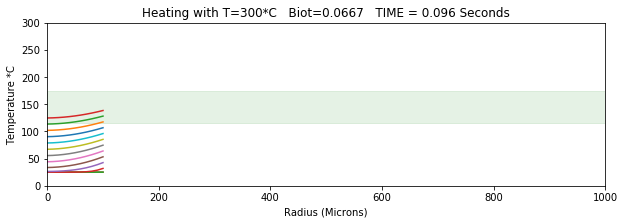

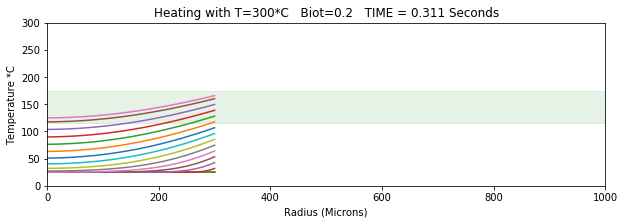

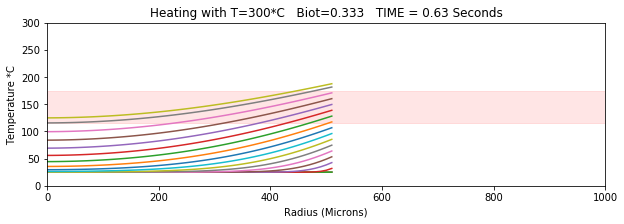

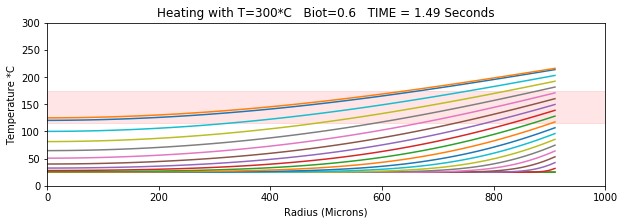

In [57]:

for j,Plots in enumerate(Plots_to_Make_R):
    r_vals=Rs_to_Plot[j]
    fig, ax = plt.subplots(figsize=[10,3])
    ax.set_ylim([0,300])
    ax.set_xlim([0,1000])
    ax.set_ylabel("Temperature *C")
    ax.set_xlabel("Radius (Microns)")
    for i,y in enumerate(Plot_T):
        ax.plot(r_vals*10**6,Plots[i,:]-273.15,label="time=" +str(round_2(t)*10**9)+"ns")
    ax.set_title(Titles[j])
    if (np.max(Plots)-273.15)>175:        
        ax.axhspan(115, 175, alpha=0.1, color='red')
    else:
        ax.axhspan(115, 175, alpha=0.1, color='green')     

In [7]:
Plots.shape

(30, 92)

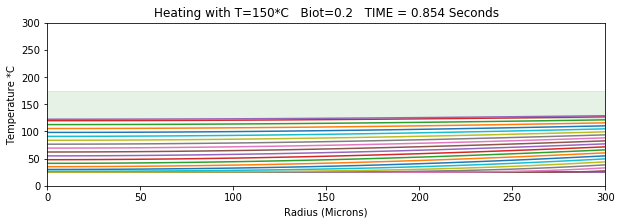

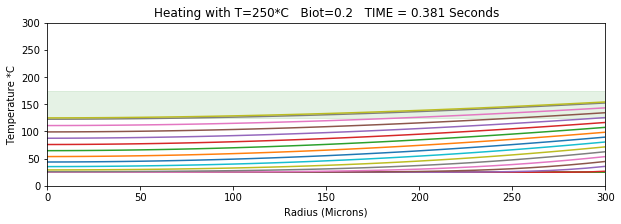

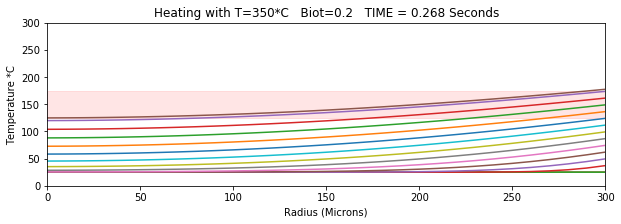

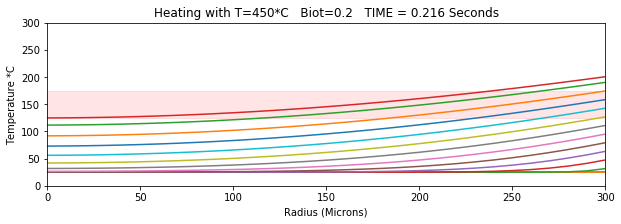

In [8]:
#Describe the Droplet
R=300*10**(-6) # Droplet Radius, meters (eg. 500 microns)
T_Settings=[150+273.16, 250+273.16, 350+273.16, 450+273.16]


h=1000          # Watts/m^2 K (convective heat transfer. a "Typical" value for flowing hot air)
k=0.500         # Watts/m K (Thermal Conductivity (Assumed Constant Here, looked up normal value for water...))
Cp=4.18         # J/g K     (Again, lookup value for water)
rho=1*10**(6)   # g/m^3      (Water by definition)
HVap=2256.4     # J/g to Evaporate water. NOTE: is 500x the Q for 1K dT - more than 5x the Q for 100C change

#Describe the System
#Ti=300 + 273.16 #K, heat of system (Maybe make f(t) eventually) 
T0=25  + 273.16 #K, Initial Temperature of water (Constant at all points)

time=0.5 # Seconds in the spray dryer (max time to solve for)
dt=0.001       # dt value, in seconds (0.1 milisecond)
t_vals=[] #New Idea. Fix delta T (at the surface), and simply RECORD the time of each step!

Plots_To_Output_T=[]
for Ti in T_Settings:
    dr=10*10**(-6) # dr value, in meters (10 microns, 100 points)
    r_vals=np.arange(0,R+dr,dr)
    A_Vals=4*np.pi*r_vals**2 #Area of the shell at r 
    V_Vals=r_vals*0
    for i,r in enumerate(r_vals[1:]):
        V_Vals[i+1] = 4/3*np.pi*r**3 - 4/3*np.pi*r_vals[i]**3 #Volume of the shell at r - 
    H_Vals=rho*V_Vals*HVap


    Temps=r_vals*0+T0 #Set initial Temperature profile = T0 is constant?
    dTdt=r_vals*0 #Set dTdt 
    Biot=(R/3)*h/k

    fig, ax = plt.subplots(figsize=[10,3])
    ax.set_ylim([0,300])
    ax.set_xlim([0,300])
    ax.set_ylabel("Temperature *C")
    ax.set_xlabel("Radius (Microns)")

    Plot_T=np.linspace(273,Ti+10,30) #Plot n solutions
    Plots,a=np.meshgrid(r_vals,Plot_T)


    #for t in t_vals:
    #     dt=0.0001
    #     #For each timestamp, first do the balance on r at the edge. 

    dT=0.005 #Kelvin per step for initial solution
    p=0 # Index of temperatures to plot.
    t=10**-15 # Initiate Time-Counter

    T_S= Temps[-1]
    while T_S <Ti*0.95 and Temps[1]<125+273.16:
        #while Temps[1]<100+273.15: #Do until 
        T_S= Temps[-1] # Surface Temperature

        if T_S > Plot_T[p]:
            p=p+1
            ax.plot(r_vals*10**6,Temps-273.15,label="time=" +str(round_2(t)*10**9)+"ns")

            #print(str(round_2(t)*10**3)+" milliSeconds")

        for i,r in enumerate(r_vals): #Loop through all r values to find dT/dt
            if r==0:
                Q_out=0         #Boundary condition at middle - no place for that temperature to go.
            else:
                Q_out=(4*np.pi*(r)**2)*k*(Temps[i]-Temps[i-1])/dr    #Conduction through shell at r

            if r==max(r_vals):
                Q_in = (4*np.pi*(r**2))*h*(Ti-Temps[i])    #Convection at edge of shell
            else:
                Q_in = (4*np.pi*((r+dr)**2))*k*(Temps[i+1]-Temps[i])/dr #Conduciton through shell at -r

            Q = Q_in - Q_out

            V=4/3*np.pi*((r+dr)**3-(r)**3)

            dTdt[i]= (Q) / (rho*V*Cp) # K/s,   (Watts) / (g/m3 * m3 * J/gK)

        if dTdt[-1]>0:
            deltaT=dT* dTdt/dTdt[-1] #CALCULATE the time step as the time required for a dT-sized change at the surface
            t=t+dT/dTdt[-1] #Capture the time elapsed
            
        #small delta T was required for smooth startup. I think we can use faster dT steps once we're in the weeds!
        if T_S>300:   # Once we pass 27 *C (Almost immediately, but still after ~100 loops)
            dT=0.01
        elif T_S>400: # Once we pass 127*C 
            dT=0.1

        Temps=Temps+deltaT
    ax.plot(r_vals*10**6,Temps-273.15,label="time=" +str(round_2(t)*10**9)+"ns")
    ax.set_title("Heating with T="+str(round(Ti-273.16))+'*C   Biot='+str(round_2(Biot)) + '   TIME = ' + str(round_2(t))+" Seconds")
    if (Temps[-1]-273.15)>175:        
        ax.axhspan(125, 175, alpha=0.1, color='red')
    else:
        ax.axhspan(125, 175, alpha=0.1, color='green')

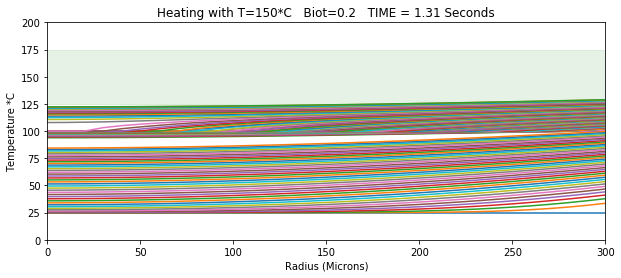

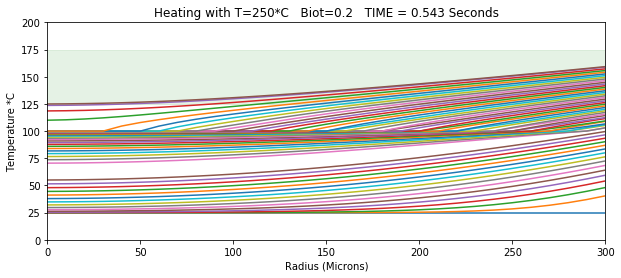

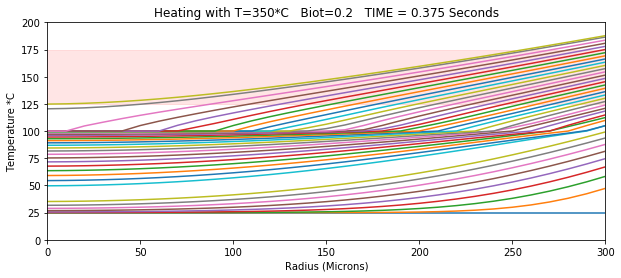

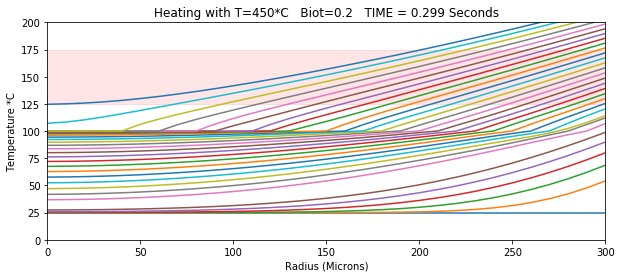

In [24]:
#Final Project for this presentation:
#Re-craft the model for constant Q steps (not t-surface)
#And add the HVap part

#Describe the Droplet
R=300*10**(-6) # Droplet Radius, meters (eg. 500 microns)
T_Settings=[150+273.16, 250+273.16, 350+273.16, 450+273.16]


h=1000          # Watts/m^2 K (convective heat transfer. a "Typical" value for flowing hot air)
k=0.500         # Watts/m K (Thermal Conductivity (Assumed Constant Here, looked up normal value for water...))
Cp=4.18         # J/g K     (Again, lookup value for water)
rho=1*10**(6)   # g/m^3      (Water by definition)
HVap=2256.4     # J/g to Evaporate water. NOTE: is 500x the Q for 1K dT - more than 5x the Q for 100C change

#Describe the System
#Ti=300 + 273.16 #K, heat of system (Maybe make f(t) eventually) 
T0=25  + 273.16 #K, Initial Temperature of water (Constant at all points)

time=0.5 # Seconds in the spray dryer (max time to solve for)
dtime=dr*10      # dt value, in seconds (0.1 milisecond) Not used?
t_vals=[] #New Idea. Fix delta T (at the surface), and simply RECORD the time of each step!

Plots_To_Output_T=[] #Initialize list of models
Titles_To_Output_T=[]
Rs_To_Output_T=[]
tcount_Out=[]
for Ti in T_Settings:
    dr=10*10**(-6) # dr value, in meters (10 microns, 100 points)
    r_vals=np.arange(0,R+dr,dr)
    A_Vals=4*np.pi*r_vals**2 #Area of the shell at r 
    V_Vals=r_vals*0
    for i,r in enumerate(r_vals[1:]):
        V_Vals[i+1] = 4/3*np.pi*r**3 - 4/3*np.pi*r_vals[i]**3 #Volume of the shell at r - 
    H_Vals=rho*V_Vals*HVap #Joules for each volume disc to evaporate 


    Temps=r_vals*0+T0 #Set initial Temperature profile = T0 is constant?
    dTdt=r_vals*0 #Set dTdt 
    Biot=(R/3)*h/k

    fig, ax = plt.subplots(figsize=[10,4])
    ax.set_ylim([0,200])
    ax.set_xlim([0,300])
    ax.set_ylabel("Temperature *C")
    ax.set_xlabel("Radius (Microns)")

    Plot_Time=np.arange(0,10,0.01) #Plot n solutions in 0.5 seconds in equal timesteps!
    Plots,a=np.meshgrid(r_vals,np.arange(0,5,dtime)) #This is how you get the data out of the loop!


    #for t in t_vals:
    #     dt=0.0001
    #     #For each timestamp, first do the balance on r at the edge. 

    dT=0.005 #Kelvin per step for initial solution
    p=0 # Index of temperatures to plot.
    tcount=0
    t=10**-15 # Initiate Time-Counter

    T_S= Temps[-1]
    while T_S <Ti*0.95 and Temps[1]<125+273.16:
        Plots[tcount,:]=Temps-273.16
        tcount+=1
        #while Temps[1]<100+273.15: #Do until 
        T_S= Temps[-1] # Surface Temperature

        if t > Plot_Time[p]:
            p=p+1
            ax.plot(r_vals*10**6,Temps-273.16,label="time=" +str(round_2(t)*10**9)+"ns")

            #print(str(round_2(t)*10**3)+" milliSeconds")

        for i,r in enumerate(r_vals): #Loop through all r values to find dT/dt
            #Calculate Q_In, Q_Out, in units of Watts (Joules per Second.)
            #We are now trying constant time-steps again, so 
            if r==0:
                Q_out=0         #Boundary condition at middle - no place for that temperature to go.
            else:
                Q_out=(4*np.pi*(r)**2)*k*(Temps[i]-Temps[i-1])/dr    #Conduction through shell at r

            if r==max(r_vals):
                Q_in = (4*np.pi*(r**2))*h*(Ti-Temps[i])    #Convection at edge of shell
                
            else:
                Q_in = (4*np.pi*((r+dr)**2))*k*(Temps[i+1]-Temps[i])/dr #Conduciton through shell at -r

            Q = Q_in - Q_out

            V=4/3*np.pi*((r+dr)**3-(r)**3)
            if Temps[i]>373.16 and H_Vals[i]>0: #IF boiling point and there is Enthalpy remaining to lose:
                H_Vals[i]+= (-Q)*dt #Subtract heat from the H Vap reserve
                dTdt[i]=0 #No temp change during evaporation
            else:
                dTdt[i]= (Q) / (rho*V*Cp) # K/s,   (Watts) / (g/m3 * m3 * J/gK)
            
            
        if dTdt[-1]>0:
            t=t+dtime #Capture the time elapsed
            
        #small delta T was required for smooth startup. I think we can use faster dT steps once we're in the weeds!
#         if T_S>300:   # Once we pass 27 *C (Almost immediately, but still after ~100 loops)
#             dt=0.005
#         elif T_S>400: # Once we pass 127*C 
#             dt=0.01

        Temps=Temps+dtime*dTdt
        
    while p<len(Plots):    
        Plots[p,:]=Temps-273.15 #Grab final curve and fill it for the rest
        p+=1
    
    ax.plot(r_vals*10**6,Temps-273.15,label="time=" +str(round_2(t)*10**9)+"ns")
    ax.set_title("Heating with T="+str(round(Ti-273.16))+'*C   Biot='+str(round_2(Biot)) + '   TIME = ' + str(round_2(t))+" Seconds")
    Plots_To_Output_T.append(Plots) #Initialize list of models
    Titles_To_Output_T.append("Heating with T="+str(round(Ti-273.16))+'*C   Biot='+str(round_2(Biot)) + '   TIME = ' + str(round_2(t))+" Seconds")
    Rs_To_Output_T.append(r_vals)
    if (Temps[-1]-273.15)>175:        
        ax.axhspan(125, 175, alpha=0.1, color='red')
    else:
        ax.axhspan(125, 175, alpha=0.1, color='green')

Done


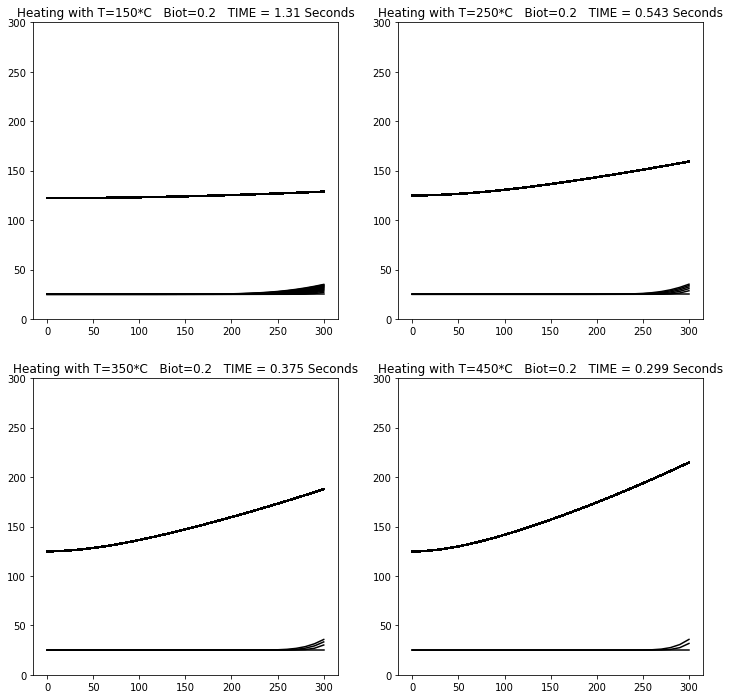

In [38]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from matplotlib.animation import FuncAnimation, writers
from IPython.display import HTML

fig = plt.figure(figsize=(12, 12))
ax0 = fig.add_subplot(221,title=Titles_To_Output_T[0],ylim=[0,300])
ax1 = fig.add_subplot(222,title=Titles_To_Output_T[1],ylim=[0,300])
ax2 = fig.add_subplot(223,title=Titles_To_Output_T[2],ylim=[0,300])
ax3 = fig.add_subplot(224,title=Titles_To_Output_T[3],ylim=[0,300])

ax0.plot(Rs_To_Output_T[0],Plots_To_Output_T[0][0,:],'k')
ax1.plot(Rs_To_Output_T[1],Plots_To_Output_T[1][0,:],'k')
ax2.plot(Rs_To_Output_T[2],Plots_To_Output_T[2][0,:],'k')
ax3.plot(Rs_To_Output_T[3],Plots_To_Output_T[3][0,:],'k')



def Animate(Time):
    ax0.plot(Rs_To_Output_T[0]*10**6,Plots_To_Output_T[0][Time,:],'k')
    ax1.plot(Rs_To_Output_T[1]*10**6,Plots_To_Output_T[1][Time,:],'k')
    ax2.plot(Rs_To_Output_T[2]*10**6,Plots_To_Output_T[2][Time,:],'k')
    ax3.plot(Rs_To_Output_T[3]*10**6,Plots_To_Output_T[3][Time,:],'k')
    #print('first')
    return ax0,ax1,ax2,ax3,

a,b,c = np.shape(Plots_To_Output_T)
for i in range(0,b,10):
    Animate(i)

# ThePlots=FuncAnimation(fig, Animate, range(0,10), interval=100)
# plt.show()
# HTML(ThePlots.to_html5_video())
print('Done')

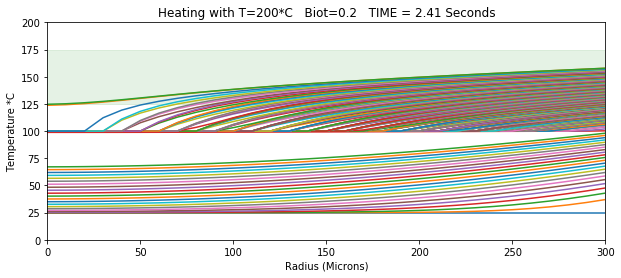

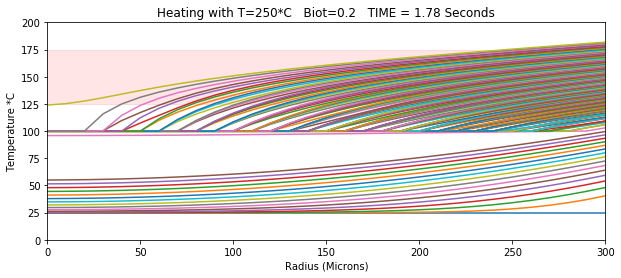

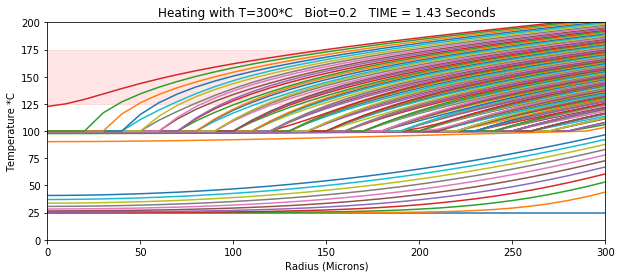

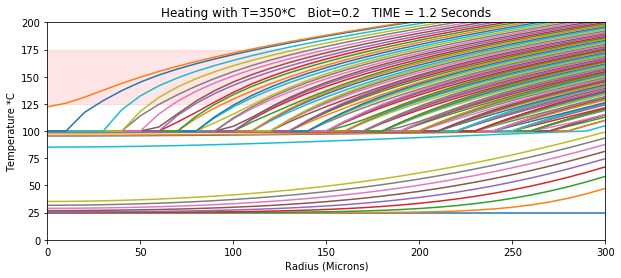

In [67]:
#OK, One more step!
#Use a changing T-Inf profile! Perhaps... Tinf changes with 10% of H? Try it out. 


#Describe the Droplet
R=300*10**(-6) # Droplet Radius, meters (eg. 500 microns)
T_Settings=[200+273.16, 250+273.16, 300+273.16, 350+273.16]


h=1000          # Watts/m^2 K (convective heat transfer. a "Typical" value for flowing hot air)
k=0.500         # Watts/m K (Thermal Conductivity (Assumed Constant Here, looked up normal value for water...))
Cp=4.18         # J/g K     (Again, lookup value for water)
rho=1*10**(6)   # g/m^3      (Water by definition)
HVap=2256.4     # J/g to Evaporate water. NOTE: is 500x the Q for 1K dT - more than 5x the Q for 100C change

#Describe the System
#Ti=300 + 273.16 #K, heat of system (Maybe make f(t) eventually) 
T0=25  + 273.16 #K, Initial Temperature of water (Constant at all points)

time=0.5 # Seconds in the spray dryer (max time to solve for)
dtime=dr*10      # dt value, in seconds (0.1 milisecond) Not used?
t_vals=[] #New Idea. Fix delta T (at the surface), and simply RECORD the time of each step!

Plots_To_Output_T=[] #Initialize list of models
Titles_To_Output_T=[]
Rs_To_Output_T=[]
tcount_Out=[]
for Ti in T_Settings:
    dr=10*10**(-6) # dr value, in meters (10 microns, 100 points)
    r_vals=np.arange(0,R+dr,dr)
    A_Vals=4*np.pi*r_vals**2 #Area of the shell at r 
    V_Vals=r_vals*0
    for i,r in enumerate(r_vals[1:]):
        V_Vals[i+1] = 4/3*np.pi*r**3 - 4/3*np.pi*r_vals[i]**3 #Volume of the shell at r - 
    H_Vals=rho*V_Vals*HVap #Joules for each volume disc to evaporate 


    Temps=r_vals*0+T0 #Set initial Temperature profile = T0 is constant?
    dTdt=r_vals*0 #Set dTdt 
    Biot=(R/3)*h/k

    fig, ax = plt.subplots(figsize=[10,4])
    ax.set_ylim([0,200])
    ax.set_xlim([0,300])
    ax.set_ylabel("Temperature *C")
    ax.set_xlabel("Radius (Microns)")

    Plot_Time=np.arange(0,20,0.01) #Plot n solutions in 0.5 seconds in equal timesteps!
    Plots,a=np.meshgrid(r_vals,np.arange(0,5,dtime)) #This is how you get the data out of the loop!


    #for t in t_vals:
    #     dt=0.0001
    #     #For each timestamp, first do the balance on r at the edge. 

    dT=0.005 #Kelvin per step for initial solution
    p=0 # Index of temperatures to plot.
    tcount=0
    t=10**-15 # Initiate Time-Counter

    T_S= Temps[-1]
    Ti_Variable=Ti #Initialize changing Temperature
    while T_S <Ti*0.95 and Temps[1]<125+273.16 and tcount<len(Plots):
        Ti_Variable+=(-abs((4*np.pi*(r**2))*(4*h)*(Ti_Variable-Temps[i])*dt)) #Looses by h/10? Rough Model parameter.
        Plots[tcount,:]=Temps-273.16
        tcount+=1
        #while Temps[1]<100+273.15: #Do until 
        T_S= Temps[-1] # Surface Temperature

        if t > Plot_Time[p]:
            p=p+1
            ax.plot(r_vals*10**6,Temps-273.16,label="time=" +str(round_2(t)*10**9)+"ns")

            #print(str(round_2(t)*10**3)+" milliSeconds")

        for i,r in enumerate(r_vals): #Loop through all r values to find dT/dt
            #Calculate Q_In, Q_Out, in units of Watts (Joules per Second.)
            #We are now trying constant time-steps again, so 
            if r==0:
                Q_out=0         #Boundary condition at middle - no place for that temperature to go.
            else:
                Q_out=(4*np.pi*(r)**2)*k*(Temps[i]-Temps[i-1])/dr    #Conduction through shell at r

            if r==max(r_vals):
                Q_in = (4*np.pi*(r**2))*h*(Ti_Variable-Temps[i])    #Convection at edge of shell
                
            else:
                Q_in = (4*np.pi*((r+dr)**2))*k*(Temps[i+1]-Temps[i])/dr #Conduciton through shell at -r

            Q = Q_in - Q_out

            V=4/3*np.pi*((r+dr)**3-(r)**3)
            if Temps[i]>373.16 and H_Vals[i]>0: #IF boiling point and there is Enthalpy remaining to lose:
                H_Vals[i]+= (-Q)*dt #Subtract heat from the H Vap reserve
                dTdt[i]=0 #No temp change during evaporation
            else:
                dTdt[i]= (Q) / (rho*V*Cp) # K/s,   (Watts) / (g/m3 * m3 * J/gK)
            
            
        if dTdt[-1]>0:
            t=t+dtime #Capture the time elapsed
            
        #small delta T was required for smooth startup. I think we can use faster dT steps once we're in the weeds!
#         if T_S>300:   # Once we pass 27 *C (Almost immediately, but still after ~100 loops)
#             dt=0.005
#         elif T_S>400: # Once we pass 127*C 
#             dt=0.01

        Temps=Temps+dtime*dTdt
        
    while p<len(Plots):    
        Plots[p,:]=Temps-273.15 #Grab final curve and fill it for the rest
        p+=1
    
    ax.plot(r_vals*10**6,Temps-273.15,label="time=" +str(round_2(t)*10**9)+"ns")
    ax.set_title("Heating with T="+str(round(Ti-273.16))+'*C   Biot='+str(round_2(Biot)) + '   TIME = ' + str(round_2(t))+" Seconds")
    Plots_To_Output_T.append(Plots) #Initialize list of models
    Titles_To_Output_T.append("Heating with T="+str(round(Ti-273.16))+'*C   Biot='+str(round_2(Biot)) + '   TIME = ' + str(round_2(t))+" Seconds")
    Rs_To_Output_T.append(r_vals)
    if (Temps[-1]-273.15)>175:        
        ax.axhspan(125, 175, alpha=0.1, color='red')
    else:
        ax.axhspan(125, 175, alpha=0.1, color='green')